In [1]:
"""
trs graphics
"""
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_bvp
import numpy as np
import pandas as pd
import math

a = 6.396483410
b = 700000.
c = 9.137833443e-6


def u_func(x):
    return 2e-17 * math.cosh(x)


def du_func(x):
    return 2e-17 * math.sinh(x)


def ode_syst(w, t, m):
    """
    Defines the differential equations.
    Arguments:
        w :  vector of the state variables:
                  w = [x,v]
        t :  time
        m :  parameter
    """
    x, v = w
    return [v, -du_func(x)/m]

########################################


def u_func_sc(x):
    return 2e-17 * math.cosh(x)


def du_func_sc(x):
    return 2e-17 * math.sinh(x)

# ОДУ для отмасштабир
def ode_syst_sc(w, t, m):
    """
    Defines the differential equations.
    Arguments:
        w :  vector of the state variables:
                  w = [x,v]
        t :  time
        m :  parameter
    """
    x, v = w
    return [b*c*v/a, -c*du_func(a*x)/(m*b)]

########################################


def ode_syst_2(x, y):
    return np.vstack((y[1], y[0] + 2 - x**2))


def bc(ya, yb):
    return np.array([ya[0]-ya[1]-1, yb[1]-1])


def exact_sol(x):
    return -19*np.exp(x-10)+x*x-119*np.exp(-x-10)/2-119*np.exp(x-30)/2

# Task 1

запускаете cpp файл для какого-то шага step1 t1() и для step2 t1()

сохраняйте файлы '1_step1_or.csv'

запускаете task1()

(для других значений шага повторяете всё тоже самое)

In [2]:
def task1():
    # считывает оринальные и рисует оригинальные значения (or)
    df_eul = pd.read_csv('./1_step1_or.csv')
    numpoints = df_eul.shape[0]
    print(df_eul.shape)
    fig_1, axes_1 = plt.subplots(nrows=2, sharex=True)
    axes_1[0].plot(df_eul['t'], df_eul['x'])
    axes_1[1].plot(df_eul['t'], df_eul['v'])
    axes_1[0].set_ylabel('x')
    axes_1[1].set_ylabel('v')
    axes_1[1].set_xlabel('t')
    '''
    plt.xlabel('t')
    plt.ylabel('x')
    plt.legend()
    plt.grid(visible=True)'''
    fig_1.tight_layout()
    fig_1.suptitle(f'Задание 1.1 (м. Эйлера). {numpoints} узлов.', fontsize=10)
    plt.subplots_adjust(top=0.9)
    plt.plot()
    plt.show()

    # -----------

    m = 1.67e-27
    # x0 = 0
    # v0 = 7e5/b
    # stoptime = 4e-5/c
    x0 = 0
    v0 = 7e5
    stoptime = 4e-5
    t = [stoptime*float(i) / (numpoints-1) for i in range(numpoints)]
    w0 = [x0, v0]
    # wsol = odeint(ode_syst_sc, w0, t, args=(m,))
    wsol = odeint(ode_syst, w0, t, args=(m,))

    x_arr = np.zeros(numpoints)
    v_arr = np.zeros(numpoints)
    for i in range(numpoints):
        x_arr[i] = wsol[i][0]
        v_arr[i] = wsol[i][1]
    fig_1, axes_1 = plt.subplots(nrows=2, sharex=True)
    axes_1[0].plot(t, x_arr)
    axes_1[1].plot(t, v_arr)
    axes_1[0].set_ylabel('x')
    axes_1[1].set_ylabel('v')
    axes_1[1].set_xlabel('t')
    fig_1.tight_layout()
    fig_1.suptitle(f'Задание 1.3 (scipy). {numpoints} узлов.', fontsize=10)
    plt.subplots_adjust(top=0.9)
    plt.plot()
    plt.show()

    # -----------

    fig_1, axes_1 = plt.subplots(nrows=2, sharex=True)
    axes_1[0].plot(t, abs(x_arr-df_eul['x']))
    axes_1[1].plot(t, abs(v_arr-df_eul['v']))
    axes_1[0].set_ylabel('x')
    axes_1[1].set_ylabel('v')
    axes_1[1].set_xlabel('t')
    fig_1.tight_layout()
    fig_1.suptitle(f'Задание 1.3 (м. Эйлера, ошибка). {numpoints} узлов.', fontsize=10)
    plt.subplots_adjust(top=0.9)
    plt.plot()
    plt.show()
    max_err_x = max(abs(x_arr-df_eul['x']))
    max_err_v = max(abs(v_arr-df_eul['v']))
    print(f'Задание 1.3 (ошибка). {numpoints} узлов.')
    print('max_err_x=', end='')
    print('{:.3E}'.format(max_err_x))
    print('max_err_v=', end='')
    print('{:.3E}'.format(max_err_v))

    # -----------

    df_eul2 = pd.read_csv('./1_step2_or.csv')
    step1 = df_eul['t'][1]
    step2 = df_eul2['t'][1]
    print(f"step1={step1}, step2={step2}")
    sigma = step2/(step2-step1)
    sigma_1 = -step1/(step2-step1)
    fig_1, axes_1 = plt.subplots(nrows=2, sharex=True)
    df_runge_rule_x = np.zeros(numpoints)
    df_runge_rule_v = np.zeros(numpoints)
    for i in range(numpoints):
        df_runge_rule_x[i] = sigma*df_eul['x'][i]+sigma_1*df_eul2['x'][2*i]
        df_runge_rule_v[i] = sigma*df_eul['v'][i]+sigma_1*df_eul2['v'][2*i]
    axes_1[0].plot(df_eul['t'], df_runge_rule_x)
    axes_1[1].plot(df_eul['t'], df_runge_rule_v)
    axes_1[0].set_ylabel('x')
    axes_1[1].set_ylabel('v')
    axes_1[1].set_xlabel('t')
    '''
    plt.xlabel('t')
    plt.ylabel('x')
    plt.legend()
    plt.grid(visible=True)'''
    fig_1.tight_layout()
    fig_1.suptitle(f'Задание 1.1 (пр. Рунге). {numpoints} узлов.', fontsize=10)
    plt.subplots_adjust(top=0.9)
    plt.plot()
    plt.show()

    # -----------

    fig_1, axes_1 = plt.subplots(nrows=2, sharex=True)
    axes_1[0].plot(t, abs(x_arr-df_runge_rule_x))
    axes_1[1].plot(t, abs(v_arr-df_runge_rule_v))
    axes_1[0].set_ylabel('x')
    axes_1[1].set_ylabel('v')
    axes_1[1].set_xlabel('t')
    fig_1.tight_layout()
    fig_1.suptitle(f'Задание 1.3 (пр. Рунге, ошибка). {numpoints} узлов.', fontsize=10)
    plt.subplots_adjust(top=0.9)
    plt.plot()
    plt.show()
    max_err_x = max(abs(x_arr-df_runge_rule_x))
    max_err_v = max(abs(v_arr-df_runge_rule_v))
    print('Задание 1.3 (пр. Рунге, ошибка).')
    print('max_err_x=', end='')
    print('{:.3E}'.format(max_err_x))
    print('max_err_v=', end='')
    print('{:.3E}'.format(max_err_v))




(400001, 3)


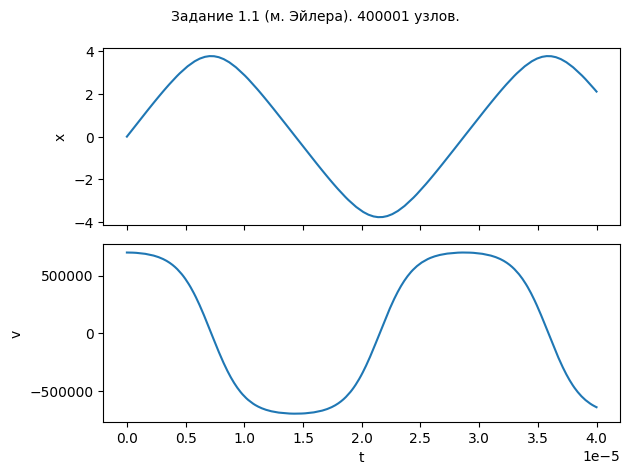

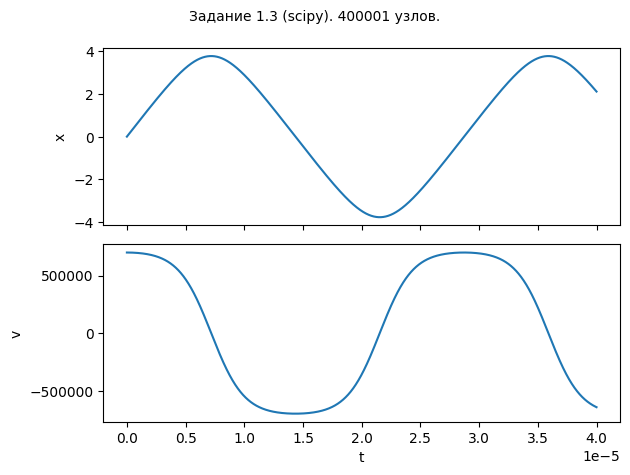

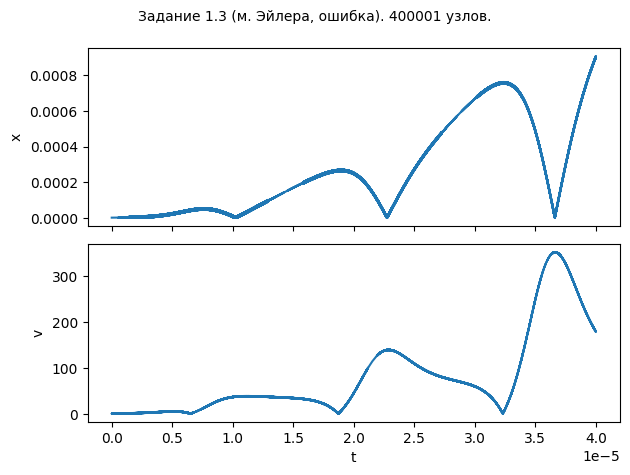

Задание 1.3 (ошибка). 400001 узлов.
max_err_x=9.092E-04
max_err_v=3.520E+02
step1=1e-10, step2=5e-11


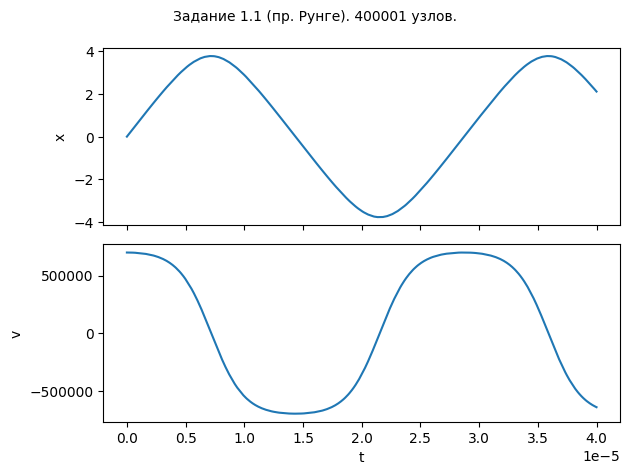

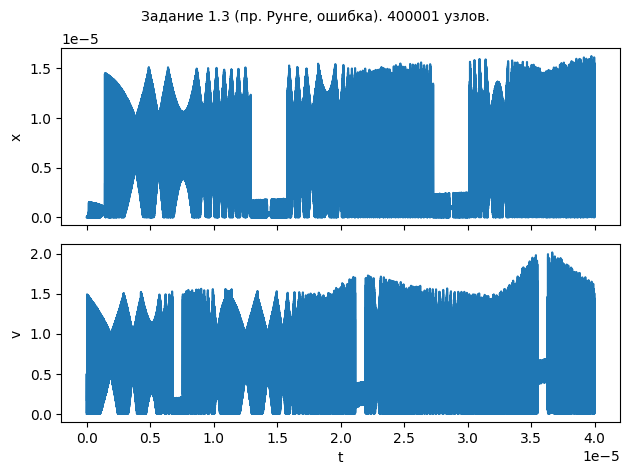

Задание 1.3 (пр. Рунге, ошибка).
max_err_x=1.622E-05
max_err_v=2.014E+00


In [3]:
task1()

# Task 2

запускаете cpp файл для какого-то шага step1 t2()

сохраняйте файлы '2_or.csv' (также нужен соотв файл с предыд задания '1_step1_or.csv')

запускаете task2()

(для других значений шага повторяете всё тоже самое)

In [4]:
def task2():
    df_adam = pd.read_csv('./2_or.csv')
    numpoints = df_adam.shape[0]
    fig_1, axes_1 = plt.subplots(nrows=2, sharex=True)
    axes_1[0].plot(df_adam['t'], df_adam['x'])
    axes_1[1].plot(df_adam['t'], df_adam['v'])
    axes_1[0].set_ylabel('x')
    axes_1[1].set_ylabel('v')
    axes_1[1].set_xlabel('t')
    fig_1.tight_layout()
    fig_1.suptitle(f'Задание 2.1. {numpoints} узлов.', fontsize=10)
    plt.subplots_adjust(top=0.9)
    plt.plot()
    plt.show()

    # ----------

    m = 1.67e-27
    x0 = 0
    # v0 = 7e5/b
    # stoptime = 4e-5/c
    v0 = 7e5
    stoptime = 4e-5
    t = [stoptime*float(i) / (numpoints-1) for i in range(numpoints)]
    w0 = [x0, v0]
    # wsol = odeint(ode_syst_sc, w0, t, args=(m,))
    wsol = odeint(ode_syst, w0, t, args=(m,))

    x_arr = np.zeros(numpoints)
    v_arr = np.zeros(numpoints)
    for i in range(numpoints):
        x_arr[i] = wsol[i][0]
        v_arr[i] = wsol[i][1]

    fig_1, axes_1 = plt.subplots(nrows=2, sharex=True)
    axes_1[0].plot(t, abs(x_arr-df_adam['x']))
    axes_1[1].plot(t, abs(v_arr-df_adam['v']))
    axes_1[0].set_ylabel('x')
    axes_1[1].set_ylabel('v')
    axes_1[1].set_xlabel('t')
    fig_1.tight_layout()
    fig_1.suptitle(f'Задание 2.3 (ошибка). {numpoints} узлов.', fontsize=10)
    plt.subplots_adjust(top=0.9)
    plt.plot()
    plt.show()
    max_err_x = max(abs(x_arr-df_adam['x']))
    max_err_v = max(abs(v_arr-df_adam['v']))
    print('Задание 2.3 (ошибка)')
    print('max_err_x=', end='')
    print('{:.3E}'.format(max_err_x))
    print('max_err_v=', end='')
    print('{:.3E}'.format(max_err_v))

    # -----------

    df_eul = pd.read_csv('./1_step1_or.csv')
    fig_1, axes_1 = plt.subplots(nrows=2, sharex=True)
    axes_1[0].plot(t, abs(df_eul['x']-df_adam['x']))
    axes_1[1].plot(t, abs(df_eul['v']-df_adam['v']))
    axes_1[0].set_ylabel('x')
    axes_1[1].set_ylabel('v')
    axes_1[1].set_xlabel('t')
    fig_1.tight_layout()
    fig_1.suptitle(f'Задание 2.3 (разница с м. Эйлера). {numpoints} узлов.', fontsize=10)
    plt.subplots_adjust(top=0.9)
    plt.plot()
    plt.show()
    max_err_x = max(abs(df_eul['x']-df_adam['x']))
    max_err_v = max(abs(df_eul['v']-df_adam['v']))
    print('Задание 2.3 (разница с м. Эйлера)')
    print('max_err_x=', end='')
    print('{:.3E}'.format(max_err_x))
    print('max_err_v=', end='')
    print('{:.3E}'.format(max_err_v))

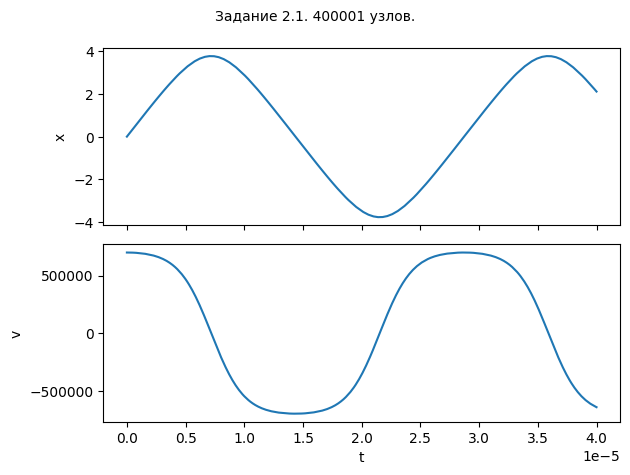

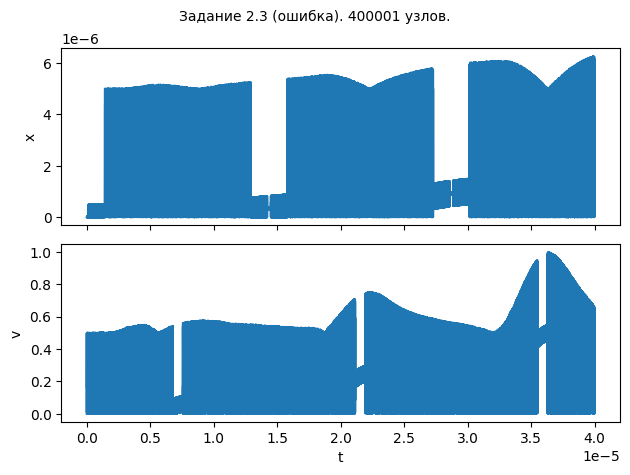

Задание 2.3 (ошибка)
max_err_x=6.263E-06
max_err_v=9.960E-01


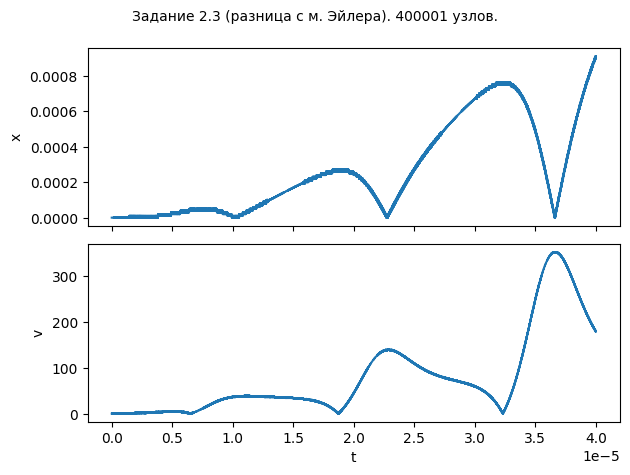

Задание 2.3 (разница с м. Эйлера)
max_err_x=9.100E-04
max_err_v=3.520E+02


In [5]:
task2()

# Task 3

запускаете cpp файл для какого-то шага step1 t3()

сохраняйте файлы '3_or.csv' (также нужны соотв файл с предыд заданий '1_step1_or.csv' '2_or.csv')

запускаете task3()

(для других значений шага повторяете всё тоже самое)

In [14]:
def task3():
    df_rk4 = pd.read_csv('./3_or.csv')
    numpoints = df_rk4.shape[0]
    fig_1, axes_1 = plt.subplots(nrows=2, sharex=True)
    axes_1[0].plot(df_rk4['t'], df_rk4['x'])
    axes_1[1].plot(df_rk4['t'], df_rk4['v'])
    axes_1[0].set_ylabel('x')
    axes_1[1].set_ylabel('v')
    axes_1[1].set_xlabel('t')
    fig_1.tight_layout()
    fig_1.suptitle(f'Задание 3.1. {numpoints} узлов.', fontsize=10)
    plt.subplots_adjust(top=0.9)
    plt.plot()
    plt.show()

    # ----------

    m = 1.67e-27
    x0 = 0
    # v0 = 7e5/b
    # stoptime = 4e-5/c
    v0 = 7e5
    stoptime = 4e-5
    t = [stoptime*float(i) / (numpoints-1) for i in range(numpoints)]
    w0 = [x0, v0]
    # wsol = odeint(ode_syst_sc, w0, t, args=(m,))
    wsol = odeint(ode_syst, w0, t, args=(m,))

    x_arr = np.zeros(numpoints)
    v_arr = np.zeros(numpoints)
    for i in range(numpoints):
        x_arr[i] = wsol[i][0]
        v_arr[i] = wsol[i][1]

    fig_1, axes_1 = plt.subplots(nrows=2, sharex=True)
    axes_1[0].plot(t, abs(x_arr-df_rk4['x']))
    axes_1[1].plot(t, abs(v_arr-df_rk4['v']))
    axes_1[0].set_ylabel('x')
    axes_1[1].set_ylabel('v')
    axes_1[1].set_xlabel('t')
    fig_1.tight_layout()
    fig_1.suptitle(f'Задание 3.3 (ошибка). {numpoints} узлов.', fontsize=10)
    plt.subplots_adjust(top=0.9)
    plt.plot()
    plt.show()
    max_err_x = max(abs(x_arr-df_rk4['x']))
    max_err_v = max(abs(v_arr-df_rk4['v']))
    print('Задание 3.3 (ошибка)')
    print('max_err_x=', end='')
    print('{:.3E}'.format(max_err_x))
    print('max_err_v=', end='')
    print('{:.3E}'.format(max_err_v))

    # -----------

    df_adam = pd.read_csv('./2_or.csv')
    fig_1, axes_1 = plt.subplots(nrows=2, sharex=True)
    axes_1[0].plot(t, abs(df_adam['x']-df_rk4['x']))
    axes_1[1].plot(t, abs(df_adam['v']-df_rk4['v']))
    axes_1[0].set_ylabel('x')
    axes_1[1].set_ylabel('v')
    axes_1[1].set_xlabel('t')
    fig_1.tight_layout()
    fig_1.suptitle(f'Задание 3.3 (разница с м. Адамса). {numpoints} узлов.', fontsize=10)
    plt.subplots_adjust(top=0.9)
    plt.plot()
    plt.show()
    max_err_x = max(abs(df_adam['x']-df_rk4['x']))
    max_err_v = max(abs(df_adam['v']-df_rk4['v']))
    print(f'Задание 3.3 (разница с м. Адамса). {numpoints} узлов.')
    print('max_err_x=', end='')
    print('{:.3E}'.format(max_err_x))
    print('max_err_v=', end='')
    print('{:.3E}'.format(max_err_v))

    # -----------

    fig_1, axes_1 = plt.subplots(nrows=2, sharex=True)
    axes_1[0].plot(t, abs((x_arr-df_rk4['x'])/x_arr))
    axes_1[1].plot(t, abs((v_arr-df_rk4['v'])/v_arr))
    axes_1[0].set_ylabel('x')
    axes_1[1].set_ylabel('v')
    axes_1[1].set_xlabel('t')
    fig_1.tight_layout()
    fig_1.suptitle(f'Задание 3.3 (отн. ошибка). {numpoints} узлов.', fontsize=10)
    plt.subplots_adjust(top=0.9)
    plt.plot()
    plt.show()

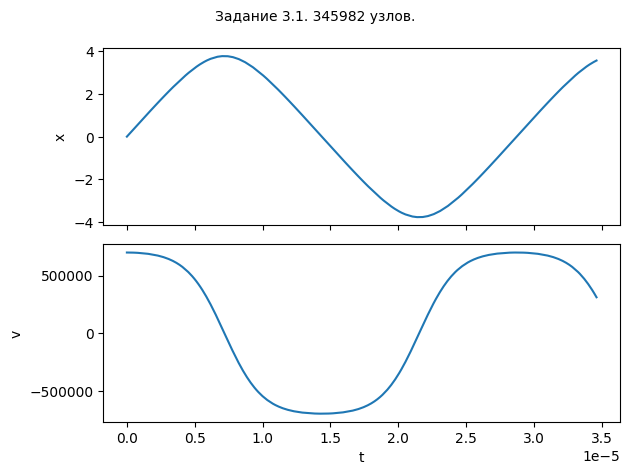

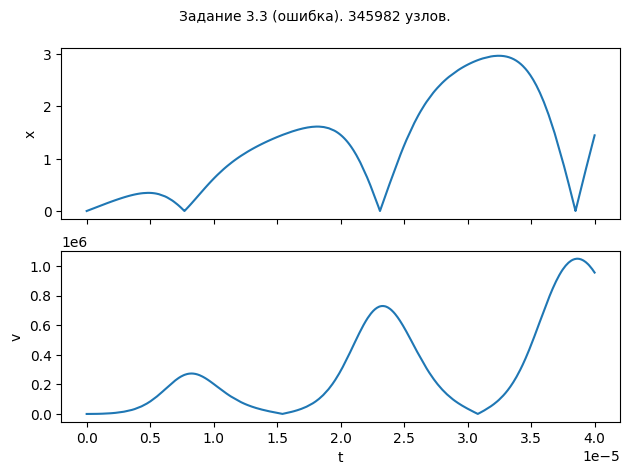

Задание 3.3 (ошибка)
max_err_x=2.968E+00
max_err_v=1.049E+06


ValueError: x and y must have same first dimension, but have shapes (345982,) and (400001,)

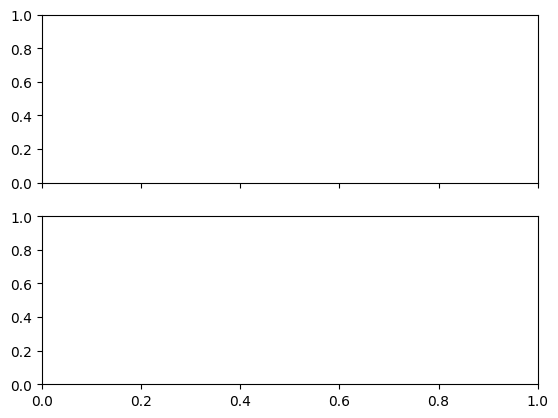

In [9]:
task3()

# Task 4

In [10]:
def task4():
    df_diag3 = pd.read_csv('./4.csv')
    numpoints = df_diag3.shape[0]
    df_diag3_x = df_diag3['x'].to_numpy()
    df_diag3_u = df_diag3['u'].to_numpy()
    plt.plot(df_diag3_x, df_diag3_u, '-b', label="diag3")
    plt.title(f'Задание 4 {numpoints}')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.grid(True)
    plt.show()

    '''
    a = df_diag3['x'][0]
    b = df_diag3['x'][numpoints-1]
    print(f'{a} ### {b}')
    u = np.zeros((2, numpoints))
    sol = solve_bvp(ode_syst_2, bc, df_diag3['x'], u)
    x_plot = np.linspace(a, b, numpoints)
    y_plot = sol.sol(x_plot)[0]
    plt.plot(x_plot, y_plot)
    plt.title(f'Задание 4 (scipy) {numpoints}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.show()
    '''
    a = df_diag3['x'][0]
    b = df_diag3['x'][numpoints-1]
    x_plot = np.linspace(a, b, numpoints)
    y_plot = exact_sol(x_plot)
    plt.plot(x_plot, y_plot)
    plt.title(f'Задание 4 (exact_sol) {numpoints}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.show()

    print(f"{x_plot.shape} % {y_plot.shape} % {df_diag3_u.shape}")
    plt.plot(x_plot, abs(y_plot-df_diag3_u))
    plt.title(f'Задание 4 (ошибка)  {numpoints}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.show()


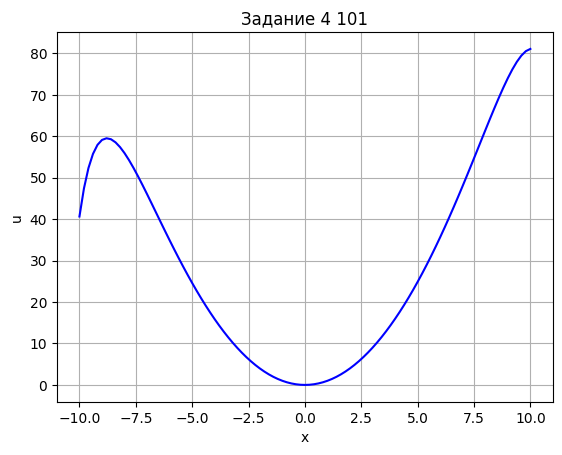

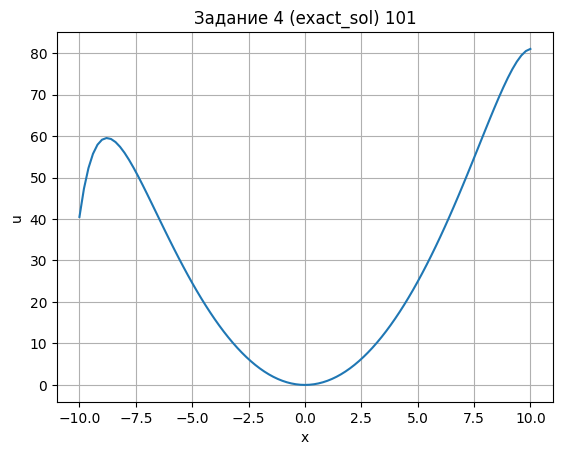

(101,) % (101,) % (101,)


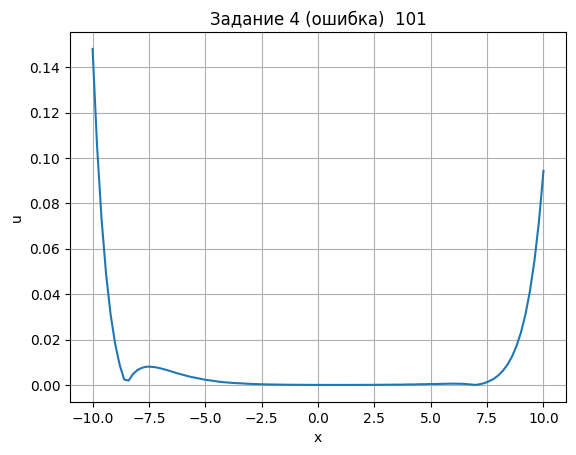

In [ ]:
task4()

# Task 5

In [11]:
def task5():
    df_shotgun = pd.read_csv('./5.csv')
    numpoints = df_shotgun.shape[0]
    plt.plot(df_shotgun['x'], df_shotgun['u'], '-b', label="df_shotgun")
    plt.title(f'Задание 5 {numpoints}')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.grid(True)
    plt.show()
    print(f"df_sh: {df_shotgun.shape}")

    '''
    numpoints = df_shotgun.shape[0]
    a = df_shotgun['x'][0]
    b = df_shotgun['x'][numpoints-1]
    u = np.zeros((2, numpoints))
    sol = solve_bvp(ode_syst_2, bc, df_shotgun['x'], u)
    x_plot = np.linspace(a, b, numpoints)
    y_plot = sol.sol(x_plot)[0]
    plt.plot(x_plot, abs(y_plot-df_shotgun['u']))
    plt.title('Задание 5 (ошибка)')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(visible=True)
    plt.show()
    '''
    a = df_shotgun['x'][0]
    b = df_shotgun['x'][numpoints-1]
    x_plot = np.linspace(a, b, numpoints)
    y_plot = exact_sol(x_plot)
    plt.plot(x_plot, abs(y_plot-df_shotgun['u']))
    plt.title(f'Задание 5 (ошибка) {numpoints}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.show()

    df_diag3 = pd.read_csv('./4.csv')
    print(f"df_diag3: {df_diag3.shape}")
    plt.plot(df_diag3['x'], abs(df_shotgun['u']-df_diag3['u']))
    plt.title(f'Задание 5 (разница с з. 4) {numpoints}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.show()




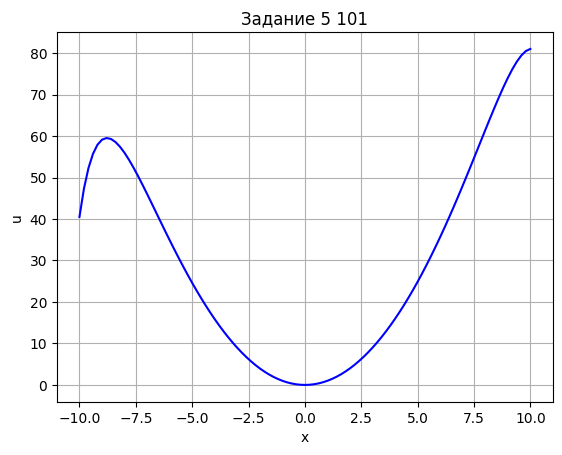

df_sh: (101, 2)


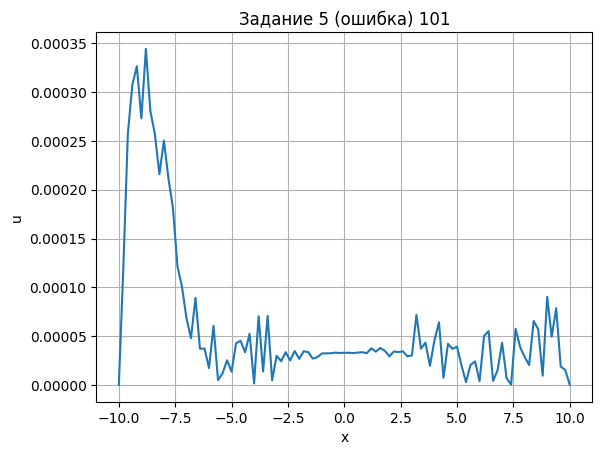

df_diag3: (101, 2)


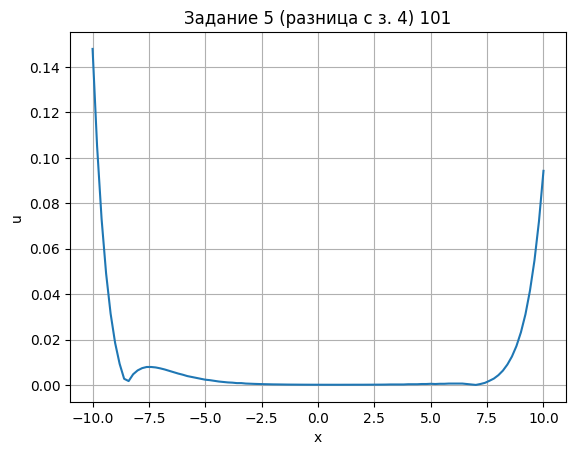

In [ ]:
task5()